In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url_bcb = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.16122/dados?formato=json&dataInicial={01-01-2000}&dataFinal={01-01-2022}'

In [5]:
#importando BCB
df = pd.read_json(url_bcb)
#convertendo data para formato datetime
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
#definir coluna data como o índice
df.set_index('data', inplace = True)

df.tail(10)

,valor
data,
2021-04-01,0.35
2021-05-01,0.57
2021-06-01,0.50
2021-07-01,0.60
2021-08-01,0.70
2021-09-01,0.67
2021-10-01,0.92
2021-11-01,0.71
2021-12-01,0.82


In [18]:
#importando IBOV
#ibov_df = web.get_data_yahoo('^bvsp', start='01-01-2000', end='01-01-2022')
#ibov_df = ibov_df.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

In [19]:
#cria coluna retorno e retorno acumulado para ibov
#ibov_df['Ret_ibov'] = ibov_df.Close.pct_change()
#ibov_df['Acum_ibov'] = (1 + ibov_df.Ret_ibov).cumprod()
#ibov_df.Acum_ibov.iloc[0] = 1
#ibov_df.head()

In [20]:
#cria coluna retorno e retorno acumulado
df['retorno'] = df.valor/100
df['ret_acum'] = (1 + (1+ df.retorno).cumprod()) -1
#df.head()

<AxesSubplot:xlabel='Date'>

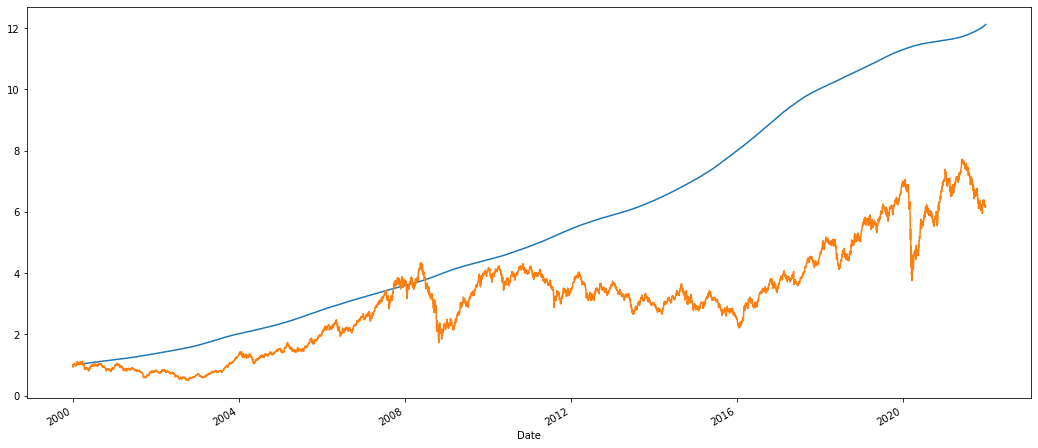

In [21]:
df.ret_acum.plot(figsize=(18,8))
ibov_df.Acum_ibov.plot(figsize=(18,8))